<a href="https://colab.research.google.com/github/Ismail-therap/LLM-and-AI-Research-2025/blob/main/Chapter_2_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The **Dataset**

In [1]:
from huggingface_hub import list_datasets

# List all datasets
all_datasets = list(list_datasets())

print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


There are 336786 datasets currently available on the Hub
The first 10 are: [DatasetInfo(id='nvidia/Llama-Nemotron-Post-Training-Dataset-v1', author='nvidia', sha='ed905e6239c9d191e4c965a403dde07a5383b5eb', created_at=datetime.datetime(2025, 3, 13, 21, 1, 9, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2025, 3, 18, 15, 56, 14, tzinfo=datetime.timezone.utc), private=False, gated=False, disabled=False, downloads=1544, downloads_all_time=None, likes=138, paperswithcode_id=None, tags=['license:cc-by-4.0', 'size_categories:10M<n<100M', 'format:json', 'modality:text', 'library:datasets', 'library:pandas', 'library:mlcroissant', 'library:polars', 'region:us'], trending_score=138, card_data=None, siblings=None), DatasetInfo(id='FreedomIntelligence/medical-o1-reasoning-SFT', author='FreedomIntelligence', sha='61536c1d80b2c799df6800cc583897b77d2c86d2', created_at=datetime.datetime(2024, 12, 28, 3, 29, 8, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2025, 2, 22,

In [2]:
!pip install datasets
from datasets import load_dataset
emotions = load_dataset("emotion")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [3]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [5]:
len(train_ds)

16000

In [13]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [14]:
train_ds.column_names

['text', 'label']

In [15]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [16]:
print(train_ds.features["label"])

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)


In [17]:
print(train_ds.features["text"])

Value(dtype='string', id=None)


In [18]:
print(train_ds.features["label"].names)

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


In [19]:
print(train_ds.features["label"].num_classes)

6


In [20]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [21]:
print(train_ds["text"][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [22]:
print(train_ds["label"][:5])

[0, 0, 3, 2, 3]


# From Datasets to DataFrames

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load the dataset
emotions = load_dataset("emotion")
df = emotions["train"].to_pandas()

# Create the 'label_name' column
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)

# Looking at the Class Distribution

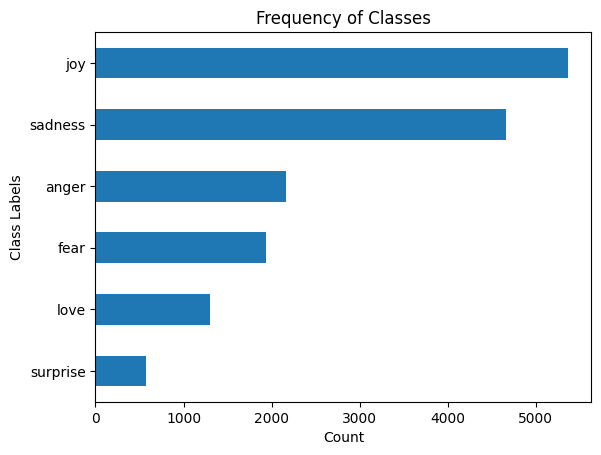

In [7]:
# Plot the frequency of each class
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.xlabel("Count")
plt.ylabel("Class Labels")
plt.show()



# How Long Are Our Tweets?

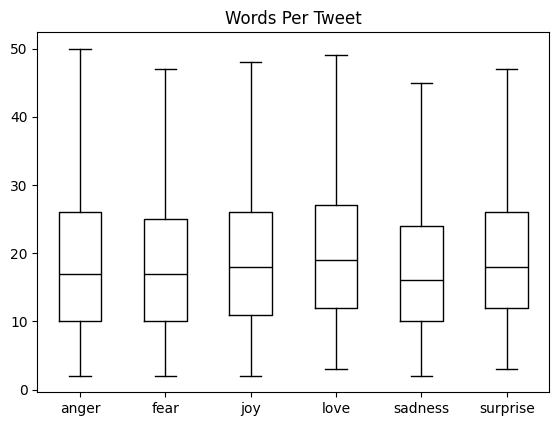

In [8]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,
showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

DistilBERT’s maximum context size = 512. So, we can use this data becase it's not crossing DistilBERT's maximum requirements.

### Suitable text format for Hugging face Transformers!

In [9]:
emotions.reset_format()

# From Text to Tokens

## Character Tokenization

The simplest tokenization scheme is to feed each character individually to the model.

In [10]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [11]:
# But we need to do numericalization

token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)



{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [12]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


The last step is to convert input_ids to a 2D tensor of one-hot vectors! Map each name to a unique ID.

In [13]:
categorical_df = pd.DataFrame(
{"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [14]:
pd.get_dummies(categorical_df["Name"],dtype=int) # One hot encoding or creating dummy variables.

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


We can create the one-hot encodings in PyTorch by converting input_ids to a tensor
and applying the one_hot() function as follows:

In [15]:
import torch
import torch.nn.functional as F
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [16]:
one_hot_encodings

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0,

In [17]:
# Creating the one hot encoding using Tensorflow as well.
import tensorflow as tf
one_hot_encodings_tf = tf.one_hot(input_ids,depth=len(token2idx))
one_hot_encodings_tf.shape

TensorShape([38, 20])

*It’s important to always  **set num_classes** in the one_hot() function
because otherwise the one-hot vectors may end up being shorter
than the length of the vocabulary (and need to be padded with
zeros manually).*

In [18]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


This requires significant
compute, memory, and data. For this reason, character tokenization is rarely used in
practice. **Word Tokenization** is much more strightforward approach instead.

## Word Tokenization

In [19]:
## Word tokenization using python split

tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


Stemming or Lemmatization: “great”, “greater”, and “greatest” all become “great”. Subword tokenization is the middle between Charecter and Word Tokenization.

## Subword Tokenization

All words = Frequent words + Rare words (smaller units)

**WordPiece** subword tokenization method used by *BERT* and *DistilBERT*!

In [20]:
# Transformers provides a convenient AutoTokenizer class... load tokenizer associated with DistilBERT!

from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [21]:
# We could have loaded the DistilBERT tokenizer as follows:
from transformers import DistilBertTokenizer
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [22]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [23]:
# Convert input_ids to tokens

tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


We can observe three things here. First, some special [CLS] and [SEP] tokens have
been added to the start and end of the sequence. These tokens differ from model to
model, but their main role is to indicate the start and end of a sequence. Second, the
tokens have each been lowercased, which is a feature of this particular checkpoint.
Finally, we can see that “tokenizing” and “NLP” have been split into two tokens,
which makes sense since they are not common words. The ## prefix in ##izing and ##  p means that the preceding string is not whitespace; any token with this prefix
should be merged with the previous token when you convert the tokens back to a
string. The AutoTokenizer class has a convert_tokens_to_string() method for
doing just that, so let’s apply it to our tokens:

In [24]:
# Convert tokens to string

print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [25]:
# vocabulary size of tokenizer
tokenizer.vocab_size

30522

In [26]:
# Maximum context size
tokenizer.model_max_length

512

In [27]:
# Names of the field of the tokenizer

tokenizer.model_input_names

['input_ids', 'attention_mask']

# Tokenizing the Whole Dataset

In [28]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)

In [29]:
# To see tokenize() in action, let’s pass a batch of two examples from the training set:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


Zeros have been added to that element to make them the same length!

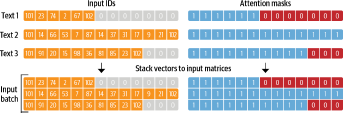

In [30]:
# Apply the processing function across att the splits in the corpus

emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [31]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


# Training a Text Classifier

###  The architecture used for sequence classification with an encoder-based transformer; it consists of the model’s pretrained body combined with a custom classifi‐cation head

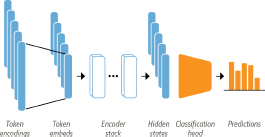

# Transformers as Feature Extractors
In the feature-based approach, the DistilBERT model is frozen and just pro‐vides features for a classifier

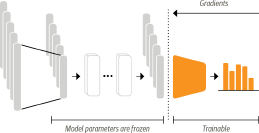

In [32]:
from transformers import AutoModel
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [33]:
# Extracting the last hidded states

text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [34]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)

print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [35]:
# [batch_size, n_tokens, hidden_dim]
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

For classification tasks, it is common practice to just use
the hidden state associated with the [CLS] token as the input feature.

In [36]:
outputs.last_hidden_state[:,0].size() # Last hidden state of the single string!

torch.Size([1, 768])

In [37]:
def extract_hidden_states(batch):
    # Place model inputs on the device
    inputs = {k: v.to(device) for k, v in batch.items()
              if k in tokenizer.model_input_names}

    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}

In [38]:
# Model expects tensors as inputs: convert them torch format

emotions_encoded.set_format("torch",
columns=["input_ids", "attention_mask", "label"])

In [39]:
# Extract hidden state
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True) # Default batch size 1000

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

## Creating a feature matrix

In [40]:
import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

## Visualizing the training set

In [42]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,X,Y,label
0,4.186180,6.213704,0
1,-3.067473,5.726264,0
2,5.143659,2.723992,3
3,-2.354024,3.847542,2
4,-3.470977,3.681697,3


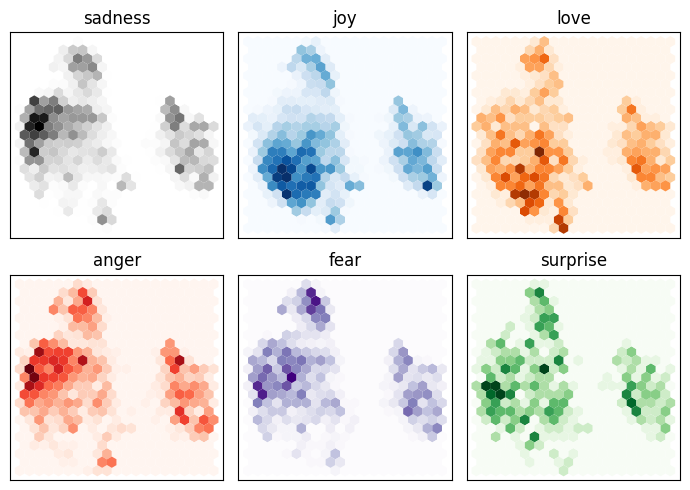

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()

## Training a simple classifier

In [45]:
# Dummy Classifier as a Baseline
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

## Logistic Regression

In [46]:
# Use Logistic Regression

from sklearn.linear_model import LogisticRegression
# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.633

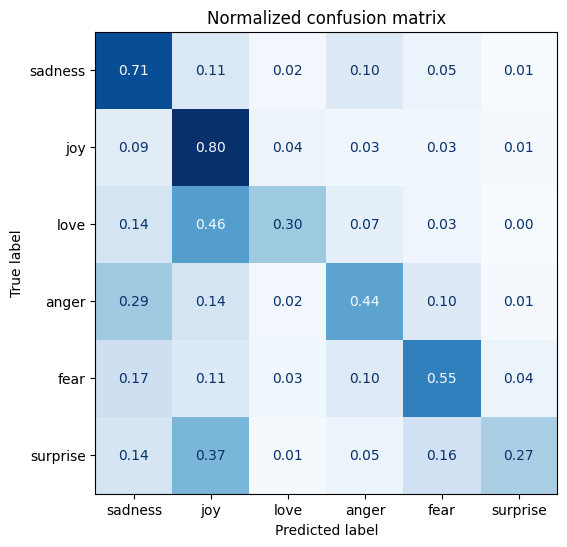

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

# Fine-Tuning Transformers

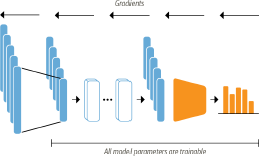

## Loading a pretrained model

In [48]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model = (AutoModelForSequenceClassification
.from_pretrained(model_ckpt, num_labels=num_labels)
.to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Defining the performance metrics

In [49]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

In [53]:
from huggingface_hub import notebook_login
notebook_login()

# torch implementaiton

In [54]:
from transformers import Trainer, TrainingArguments
batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
num_train_epochs=2,
learning_rate=2e-5,
per_device_train_batch_size=batch_size,
per_device_eval_batch_size=batch_size,
weight_decay=0.01,
evaluation_strategy="epoch",
disable_tqdm=False,
logging_steps=logging_steps,
push_to_hub=True,
log_level="error")

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [55]:
from transformers import Trainer
trainer = Trainer(model=model, args=training_args,
compute_metrics=compute_metrics,
train_dataset=emotions_encoded["train"],
eval_dataset=emotions_encoded["validation"],
tokenizer=tokenizer)
trainer.train()

<ipython-input-55-03e79bb2da31>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=training_args,
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: statistician71 (statistician71-university-of-wyoming) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.821800,0.316330,0.905500,0.904194
2,0.251200,0.220949,0.923000,0.922699


TrainOutput(global_step=500, training_loss=0.536480728149414, metrics={'train_runtime': 397.7716, 'train_samples_per_second': 80.448, 'train_steps_per_second': 1.257, 'total_flos': 720342861696000.0, 'train_loss': 0.536480728149414, 'epoch': 2.0})

In [56]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [57]:
preds_output.metrics

{'test_loss': 0.22094881534576416,
 'test_accuracy': 0.923,
 'test_f1': 0.9226985328570061,
 'test_runtime': 3.9062,
 'test_samples_per_second': 512.002,
 'test_steps_per_second': 8.192}

In [58]:
y_preds = np.argmax(preds_output.predictions, axis=1)

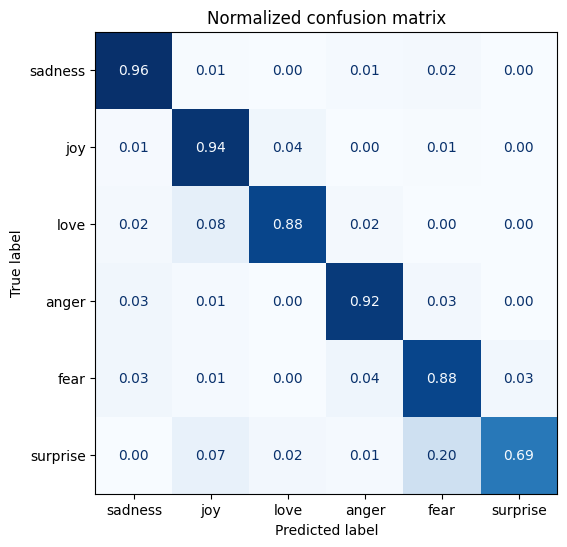

In [59]:
plot_confusion_matrix(y_preds, y_valid, labels)

# Tensorflow implementation

Now we will see how Tensorflow works and we also use Keras to fine tune model hyperparameters.

## Fine-Tuning with Keras

In [61]:
from transformers import TFAutoModelForSequenceClassification
tf_model = (TFAutoModelForSequenceClassification
.from_pretrained(model_ckpt, num_labels=num_labels))

In [62]:
# The column names to convert to TensorFlow tensors
tokenizer_columns = tokenizer.model_input_names

In [63]:
tf_train_dataset = emotions_encoded["train"].to_tf_dataset(
columns=tokenizer_columns, label_cols=["label"], shuffle=True,
batch_size=batch_size)
tf_eval_dataset = emotions_encoded["validation"].to_tf_dataset(
columns=tokenizer_columns, label_cols=["label"], shuffle=False,
batch_size=batch_size)

/usr/local/lib/python3.11/dist-packages/datasets/arrow_dataset.py:400: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [64]:
import tensorflow as tf
tf_model.compile(
optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=tf.metrics.SparseCategoricalAccuracy())
tf_model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=2)

Epoch 1/2
250/250 [==============================] - 188s 545ms/step - loss: 0.5284 - sparse_categorical_accuracy: 0.8152 - val_loss: 0.2027 - val_sparse_categorical_accuracy: 0.9255
Epoch 2/2
250/250 [==============================] - 135s 539ms/step - loss: 0.1432 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.1395 - val_sparse_categorical_accuracy: 0.9380


In [65]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate model performance on the validation dataset
eval_results = tf_model.evaluate(tf_eval_dataset)
print(f"Validation Results: {eval_results}")

32/32 [==============================] - 5s 159ms/step - loss: 0.1395 - sparse_categorical_accuracy: 0.9380
Validation Results: [0.13947910070419312, 0.9380000233650208]
32/32 [==============================] - 7s 149ms/step
Validation Accuracy: 0.9380
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       550
           1       0.94      0.96      0.95       704
           2       0.88      0.84      0.86       178
           3       0.94      0.96      0.95       275
           4       0.87      0.95      0.91       212
           5       0.91      0.79      0.85        81

    accuracy                           0.94      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.94      0.94      0.94      2000



32/32 [==============================] - 5s 148ms/step
Validation Accuracy: 0.9380
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       550
           1       0.94      0.96      0.95       704
           2       0.88      0.84      0.86       178
           3       0.94      0.96      0.95       275
           4       0.87      0.95      0.91       212
           5       0.91      0.79      0.85        81

    accuracy                           0.94      2000
   macro avg       0.92      0.91      0.91      2000
weighted avg       0.94      0.94      0.94      2000



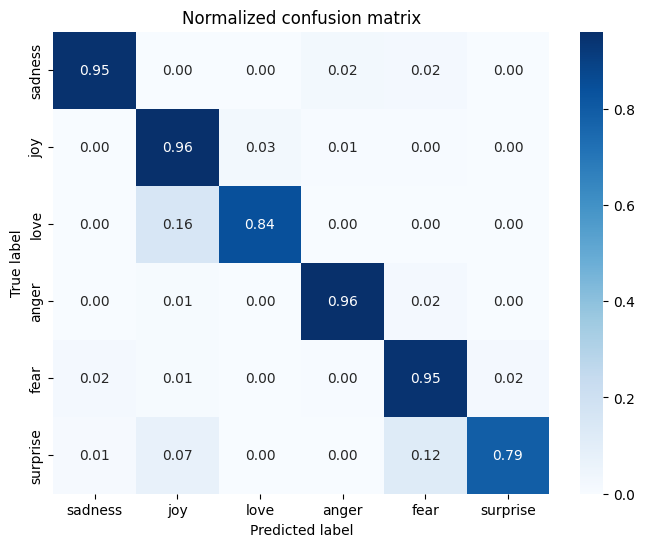

In [67]:
# Predictions and true labels
y_preds = np.argmax(tf_model.predict(tf_eval_dataset).logits, axis=1)
y_true = np.concatenate([y for x, y in tf_eval_dataset], axis=0)

# Display Accuracy
accuracy = accuracy_score(y_true, y_preds)
print(f"Validation Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_preds))

# Normalized Confusion Matrix
def plot_confusion_matrix(y_true, y_preds, labels):
    cm = confusion_matrix(y_true, y_preds, normalize='true')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Normalized confusion matrix')
    plt.show()

# Emotion labels
labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

# Plotting the Confusion Matrix
plot_confusion_matrix(y_true, y_preds, labels)

# Error Analysis

## torch Error Analysis Code

In [68]:
from torch.nn.functional import cross_entropy
def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
        if k in tokenizer.model_input_names}
    with torch.no_grad():
      output = model(**inputs)
      pred_label = torch.argmax(output.logits, axis=-1)
      loss = cross_entropy(output.logits, batch["label"].to(device),
      reduction="none")
    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

In [69]:
# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(
forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [70]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
.apply(label_int2str))

In [72]:
# Data samples with highest losses
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
882,i feel badly about reneging on my commitment t...,love,sadness,5.868340
1963,i called myself pro life and voted for perry w...,joy,sadness,5.456128
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.427117
1274,i am going to several holiday parties and i ca...,joy,sadness,5.350639
1950,i as representative of everything thats wrong ...,surprise,anger,5.229783
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.118341
765,i feel super awkward and out of place right now,joy,sadness,5.049127
465,i would eventually go in to these stores but i...,joy,fear,4.881698
1801,i feel that he was being overshadowed by the s...,love,sadness,4.773929
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.753456


In [73]:
# Data samples with smallest losses
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
1861,im tired of feeling lethargic hating to work o...,sadness,sadness,0.016024
244,im kinda relieve but at the same time i feel d...,sadness,sadness,0.016144
69,i have no extra money im worried all of the ti...,sadness,sadness,0.016300
1368,i started this blog with pure intentions i mus...,sadness,sadness,0.016330
1152,i feel pathetic because i shouldn t complain a...,sadness,sadness,0.016334
392,i remember feeling disheartened one day when w...,sadness,sadness,0.016441
189,i leave the meeting feeling more than a little...,sadness,sadness,0.016539
1140,i do think about certain people i feel a bit d...,sadness,sadness,0.016553
1303,i feel pathetic and uninspired,sadness,sadness,0.016569
1452,i always feel guilty and come to one conclusio...,sadness,sadness,0.016614


We now know that the joy is sometimes mislabeled and that the model is most confident
about predicting the label sadness. With this information we can make targeted
improvements to our dataset, and also keep an eye on the class the model seems to be
very confident about.

## TensorFlow Error Analysis Code

In [74]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Define the loss function for individual predictions
loss_fn = SparseCategoricalCrossentropy(from_logits=True, reduction='none')

# Function to calculate loss and predicted labels
def compute_loss_and_predictions(batch):
    inputs = {k: v for k, v in batch.items() if k in tokenizer.model_input_names}
    labels = batch["label"]

    # Predictions and logits
    logits = tf_model(**inputs).logits
    predicted_labels = tf.argmax(logits, axis=-1)

    # Compute individual losses
    loss = loss_fn(labels, logits)

    return {
        "loss": loss.numpy(),
        "predicted_label": predicted_labels.numpy()
    }

# Convert dataset to TensorFlow format
emotions_encoded.set_format("tensorflow", columns=["input_ids", "attention_mask", "label"])

# Compute loss and predictions
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    compute_loss_and_predictions, batched=True, batch_size=16
)

# Switch back to Pandas format for easy analysis
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]

# Map labels to text labels for readability
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = df_test["predicted_label"].apply(label_int2str)

/usr/local/lib/python3.11/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Top 10 samples with highest losses:
                                                   text     label  \
177   im sure much of the advantage is psychological...   sadness   
1950  i as representative of everything thats wrong ...  surprise   
570   i don t mean this to be harsh selfish or uncar...       joy   
860   i first had cordelia i didnt feel a strong urg...       joy   
1840  id let you kill it now but as a matter of fact...       joy   
99    im not trying to sound sarcastic but only tryi...   sadness   
259   when i noticed two spiders running on the floo...     anger   
1836  i got a very nasty electrical shock when i was...      fear   
1124                    someone acting stupid in public     anger   
1870  i guess i feel betrayed because i admired him ...       joy   

     predicted_label      loss  
177              joy  7.355877  
1950         sadness  5.609250  
570            anger  5.149917  
860             fear  4.528471  
1840            fear  4.495840  
99    

In [75]:
# Data samples with highest losses
print("Top 10 samples with highest losses:")
print(df_test.sort_values("loss", ascending=False).head(10))

Top 10 samples with highest losses:
                                                   text     label  \
177   im sure much of the advantage is psychological...   sadness   
1950  i as representative of everything thats wrong ...  surprise   
570   i don t mean this to be harsh selfish or uncar...       joy   
860   i first had cordelia i didnt feel a strong urg...       joy   
1840  id let you kill it now but as a matter of fact...       joy   
99    im not trying to sound sarcastic but only tryi...   sadness   
259   when i noticed two spiders running on the floo...     anger   
1836  i got a very nasty electrical shock when i was...      fear   
1124                    someone acting stupid in public     anger   
1870  i guess i feel betrayed because i admired him ...       joy   

     predicted_label      loss  
177              joy  7.355877  
1950         sadness  5.609250  
570            anger  5.149917  
860             fear  4.528471  
1840            fear  4.495840  
99    

In [76]:
# Data samples with smallest losses
print("Top 10 samples with smallest losses:")
print(df_test.sort_values("loss", ascending=True).head(10))

Top 10 samples with smallest losses:
                                                   text label predicted_label  \
350   i feel its hardly a loss since the food at kao...   joy             joy   
1941  i did see a few people looking at the points a...   joy             joy   
11    i was dribbling on mums coffee table looking o...   joy             joy   
715   i feel mellow i feel free and i feel completel...   joy             joy   
1480                             i feel mellow antonios   joy             joy   
400   i are just relaxing together and i feel ecstat...   joy             joy   
1558  i was feeling very bah humbugish coming out of...   joy             joy   
383   i still cannot find the damned tin certificate...   joy             joy   
382   i feel cool because the plane has four seats i...   joy             joy   
1198  i feel like i should also mention that there w...   joy             joy   

          loss  
350   0.001284  
1941  0.001291  
11    0.001312  
715

# Saving and shairng the model

The NLP community benefits greatly from sharing pretrained and fine-tuned models,
and everybody can share their models with others via the Hugging Face Hub. Any
community-generated model can be downloaded from the Hub just like we downloaded
the DistilBERT model. With the Trainer API, saving and sharing a model is
simple:



## torch based model

In [77]:
# How to save a trained model to Hugging Face!
trainer.push_to_hub(commit_message="Training completed!")

events.out.tfevents.1742493028.04d41fdeed98.330.0:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/statistician71/distilbert-base-uncased-finetuned-emotion/commit/fa8e6abaf5e48c38afb51ca01dc3b9e5238fbeb8', commit_message='Training completed!', commit_description='', oid='fa8e6abaf5e48c38afb51ca01dc3b9e5238fbeb8', pr_url=None, repo_url=RepoUrl('https://huggingface.co/statistician71/distilbert-base-uncased-finetuned-emotion', endpoint='https://huggingface.co', repo_type='model', repo_id='statistician71/distilbert-base-uncased-finetuned-emotion'), pr_revision=None, pr_num=None)

In [78]:
# How to load a pre-trained model from Hugging Face.
from transformers import pipeline
# Change `transformersbook` to your Hub username
model_id = "statistician71/distilbert-base-uncased-finetuned-emotion"
pytorch_classifier = pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

[[{'label': 'LABEL_0', 'score': 0.017886891961097717}, {'label': 'LABEL_1', 'score': 0.9490129351615906}, {'label': 'LABEL_2', 'score': 0.009949506260454655}, {'label': 'LABEL_3', 'score': 0.009115198627114296}, {'label': 'LABEL_4', 'score': 0.006917756050825119}, {'label': 'LABEL_5', 'score': 0.007117671426385641}]]


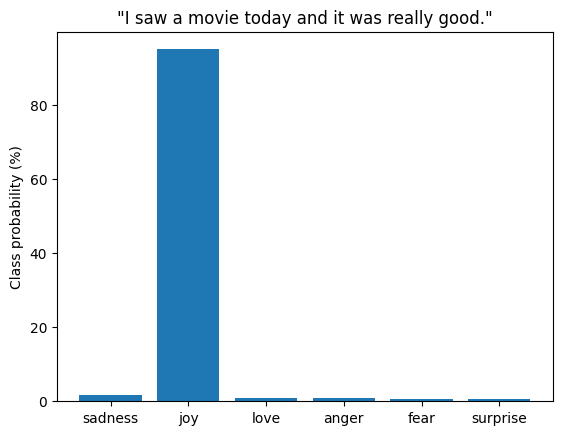

In [82]:
# Test the loaded model:

custom_tweet = "I saw a movie today and it was really good."
preds = pytorch_classifier(custom_tweet, return_all_scores=True)
print(preds)

preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

## Tensorflow based model

In [83]:
from transformers import TFAutoModelForSequenceClassification

# Push the trained model to the Hub
tf_model.push_to_hub("statistician71/distilbert-base-uncased-finetuned-emotion-tf", commit_message="Training completed!")

# Also push the tokenizer to ensure compatibility
tokenizer.push_to_hub("statistician71/distilbert-base-uncased-finetuned-emotion-tf")


tf_model.h5:   0%|          | 0.00/268M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/statistician71/distilbert-base-uncased-finetuned-emotion-tf/commit/8f5c921fdff4ef208f6a8ed9fcc6a941eb2b575e', commit_message='Upload tokenizer', commit_description='', oid='8f5c921fdff4ef208f6a8ed9fcc6a941eb2b575e', pr_url=None, repo_url=RepoUrl('https://huggingface.co/statistician71/distilbert-base-uncased-finetuned-emotion-tf', endpoint='https://huggingface.co', repo_type='model', repo_id='statistician71/distilbert-base-uncased-finetuned-emotion-tf'), pr_revision=None, pr_num=None)

In [86]:
from transformers import pipeline

# Load the TensorFlow model from the Hub
model_id = "statistician71/distilbert-base-uncased-finetuned-emotion-tf"
tf_classifier = pipeline("text-classification", model=model_id, framework="tf")

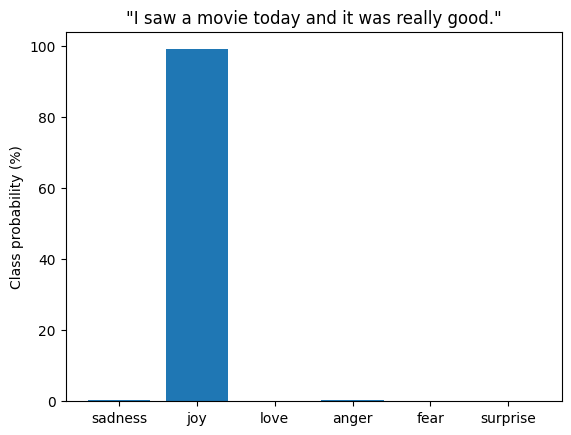

In [87]:
# Emotion labels
labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

# Test the loaded model
custom_tweet = "I saw a movie today and it was really good."
preds = tf_classifier(custom_tweet, return_all_scores=True)

# Display Predictions
preds_df = pd.DataFrame(preds[0])

plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()